<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia_computacional/blob/main/at-08/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive.zip
Melhores resultados para k=20:
Matriz de Confusão:
[[927  61]
 [ 78 934]]
Acurácia: 0.9305


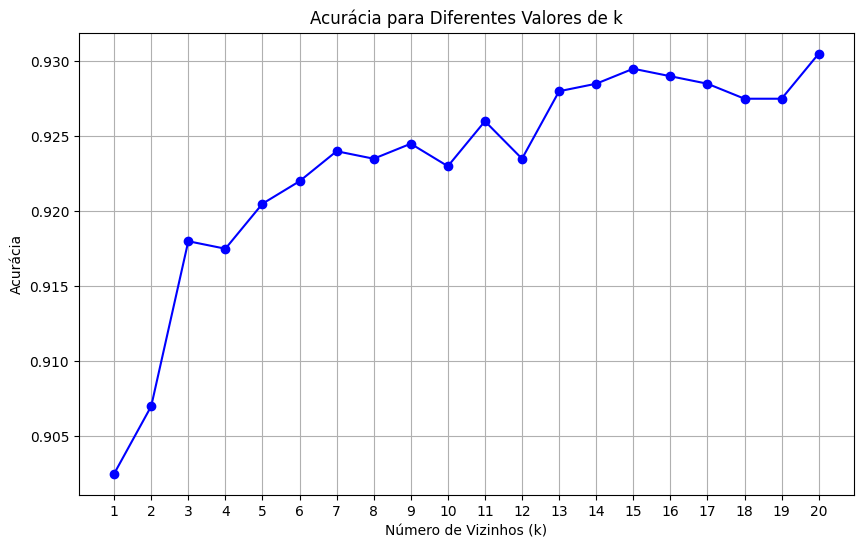

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import files
import seaborn as sns

# Carregar arquivo do PC
uploaded = files.upload()

# Obter o nome do arquivo carregado
nome_arquivo_local = list(uploaded.keys())[0]

# Carregar o dataset do arquivo local
data = pd.read_csv(nome_arquivo_local)

# Verificar se há valores ausentes ou incorretos
if data.isnull().values.any():
    print("Há valores ausentes no conjunto de dados.")
else:
    # Separar as features (X) e os rótulos (y)
    X = data.drop('name', axis=1)
    y = data['name']

    # Normalizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    def avaliar_knn(k):
        """Avalia o modelo k-NN para um dado valor de k."""
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        matriz_confusao = confusion_matrix(y_test, y_pred)
        acuracia = accuracy_score(y_test, y_pred)
        return matriz_confusao, acuracia

    resultados = []
    for k in range(1, 21):
        matriz_confusao, acuracia = avaliar_knn(k)
        resultados.append({'k': k, 'matriz_confusao': matriz_confusao, 'acuracia': acuracia})

    melhores_resultados = max(resultados, key=lambda x: x['acuracia'])
    print(f"Melhores resultados para k={melhores_resultados['k']}:")
    print("Matriz de Confusão:")
    print(melhores_resultados['matriz_confusao'])
    print("Acurácia:", melhores_resultados['acuracia'])

    # Visualização das acurácias
    acuracias = [resultado['acuracia'] for resultado in resultados]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), acuracias, marker='o', linestyle='-', color='b')
    plt.title('Acurácia para Diferentes Valores de k')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('Acurácia')
    plt.xticks(range(1, 21))
    plt.grid(True)
    plt.show()
